In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read and understand the data

In [2]:
# Importing lead dataset
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [3]:
# checking the shape of the data 
lead.shape

(9240, 37)

In [4]:
# Inspect the different columsn in the dataset

lead.columns


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# checking non null count and datatype of the variables
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
# Describing data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Check the summary of the dataset

lead.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,b45fa590-c55b-4abc-ac12-d7ae3d562446,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


### Data Cleaning and Preparation

In [8]:
# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)

In [9]:
# checking the columns for null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
lead['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

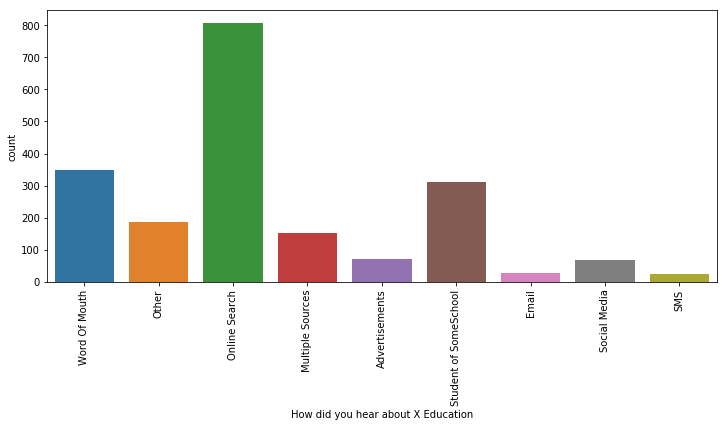

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(lead['How did you hear about X Education'])
plt.xticks(rotation=90)
plt.show()

In [12]:
# Drop all the columns in which greater than 4000 missing values are present

for col in lead.columns:
    if lead[col].isnull().sum() > 4000:
        lead.drop(col, 1, inplace=True)

In [13]:
# Check the number of null values again

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

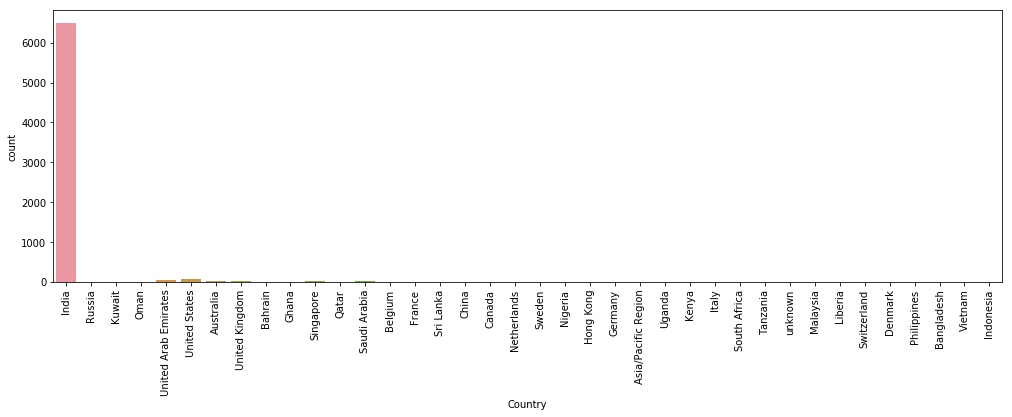

In [14]:
plt.figure(figsize=(17,5))
sns.countplot(lead['Country'])
plt.xticks(rotation=90)
plt.show()

In [15]:
# Imputing the missing data in the 'Country' column with 'India'
lead['Country']=lead['Country'].replace(np.nan,'India')

In [16]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [17]:
# Check the number of null values again

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [18]:
lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

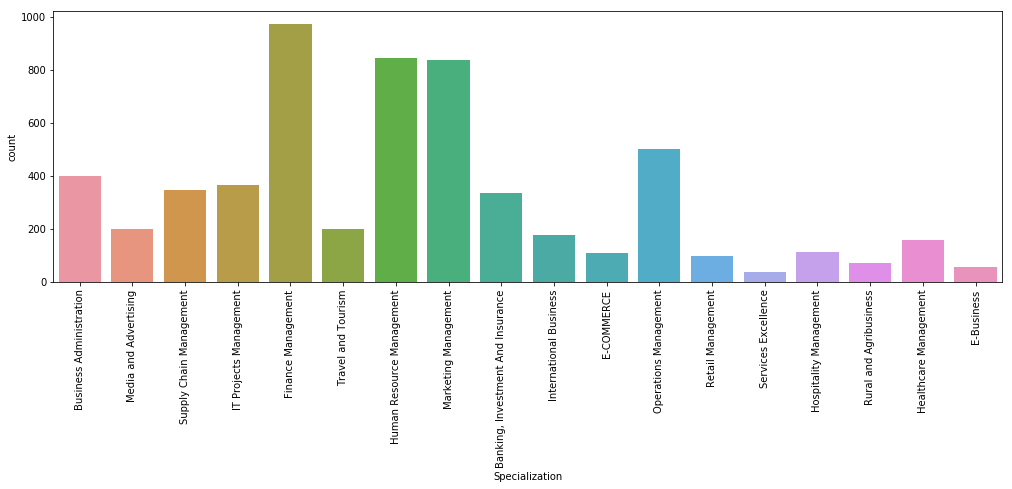

In [19]:
plt.figure(figsize=(17,5))
sns.countplot(lead['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [20]:
# Creating a separate category called 'Others' for this 
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

In [21]:
lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

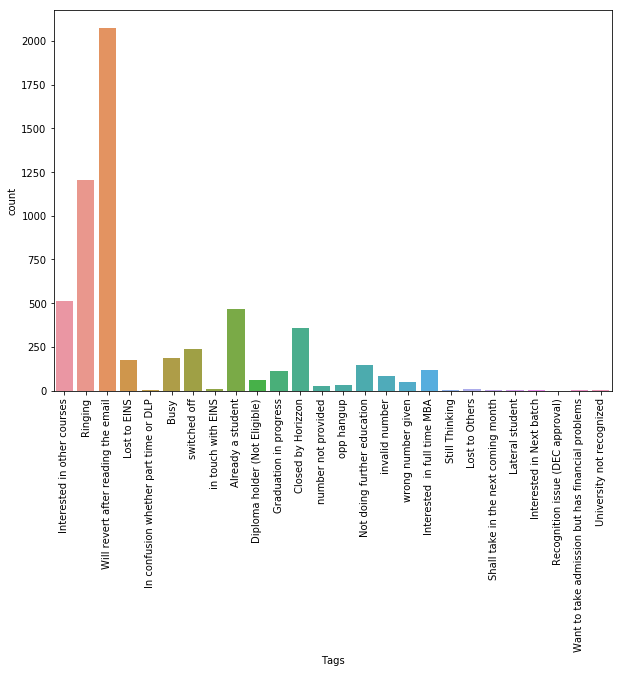

In [22]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead['Tags'])
plt.xticks(rotation=90)
plt.show()

In [23]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead['Tags']=lead['Tags'].replace(np.nan,'Will revert after reading the email')

In [24]:
lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

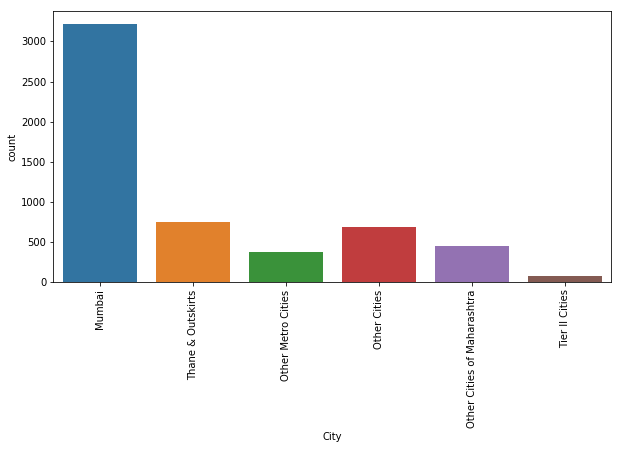

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(lead['City'])
plt.xticks(rotation=90)
plt.show()

In [26]:
# Finding the percentage of the different categories of this column:
round(lead['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [27]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [28]:
lead['What is your current occupation'].value_counts()
   

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

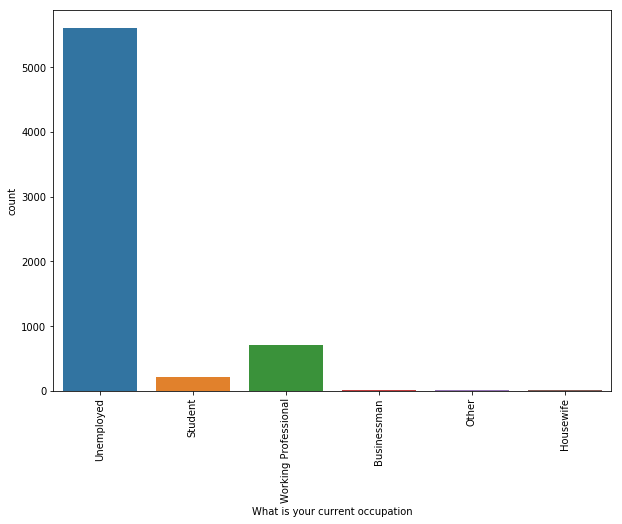

In [29]:
# Visualizing What is your current occupation column
plt.figure(figsize=(10,7))
sns.countplot(lead['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [30]:
# Finding the percentage of the different categories of this column:
round(lead['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [31]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

In [32]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
testone                 1
NC_EDM                  1
youtubechannel          1
blog                    1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

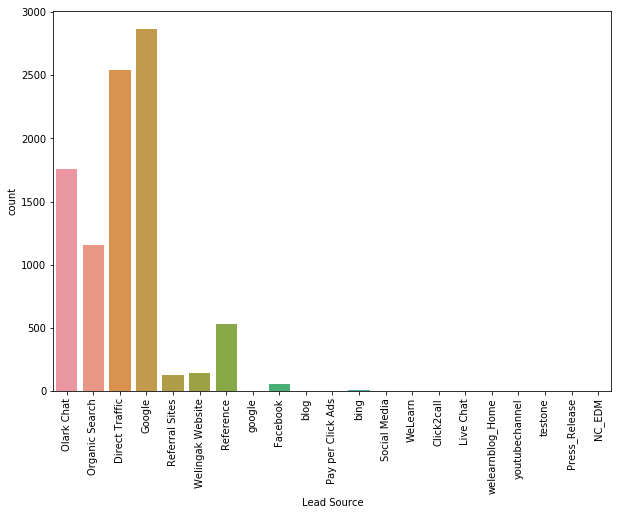

In [34]:
# Visualizing Lead Source column
plt.figure(figsize=(10,7))
sns.countplot(lead['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [35]:
# Need to replace 'google' with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [36]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

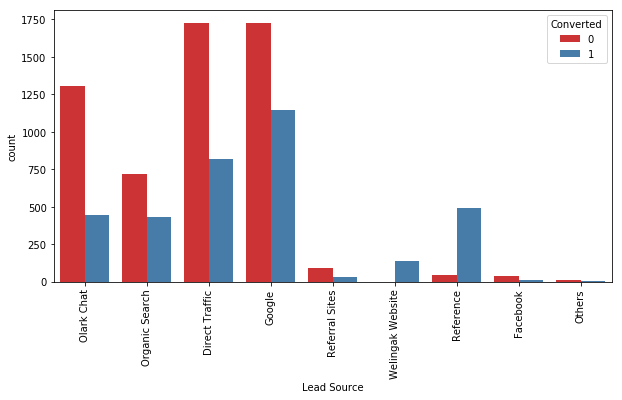

In [37]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [38]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

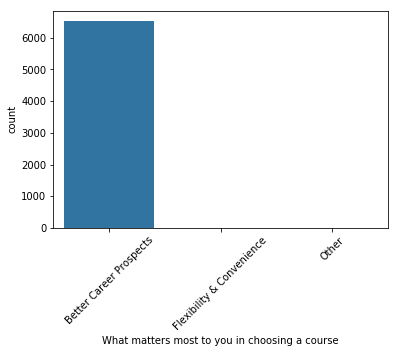

In [39]:
# Visualizing this column
sns.countplot(lead['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

In [40]:
# Finding the percentage of the different categories of this column:
round(lead['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [41]:
lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [42]:
lead.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Country                                       0
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                 

In [43]:
print(len(lead.index))


9240


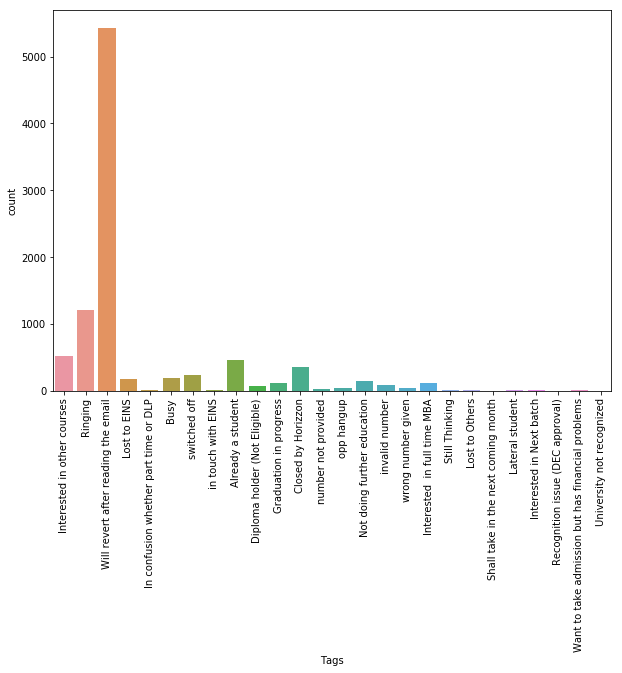

In [44]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead['Tags'])
plt.xticks(rotation=90)
plt.show()

In [45]:
# Percentage of rows retained 
(len(lead.index)/9240)*100

100.0

In [46]:
# Finding the null percentages across columns after removing the above columns
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [47]:
# Dropping the rows with null values
lead.dropna(inplace = True)

In [48]:
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset.

In [49]:
# Let's look at the dataset again

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Exploratory Data Anaysis

In [50]:
lead[lead.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### Univariate Analysis and Bivariate Analysis


Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [51]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.855411064580117

The lead conversion rate is 38%.

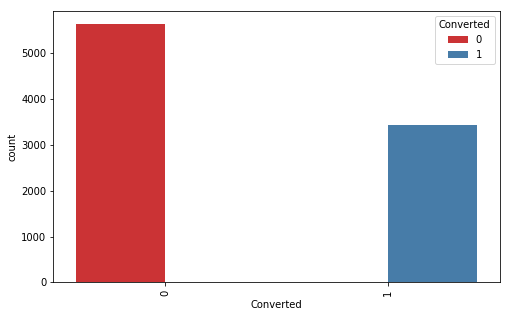

In [52]:
plt.figure(figsize=(8,5))
sns.countplot(x = "Converted",hue ="Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()


### Lead Origin

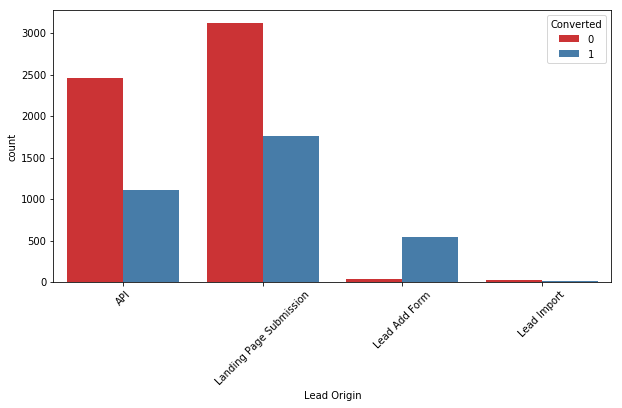

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue ="Converted", data = lead,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

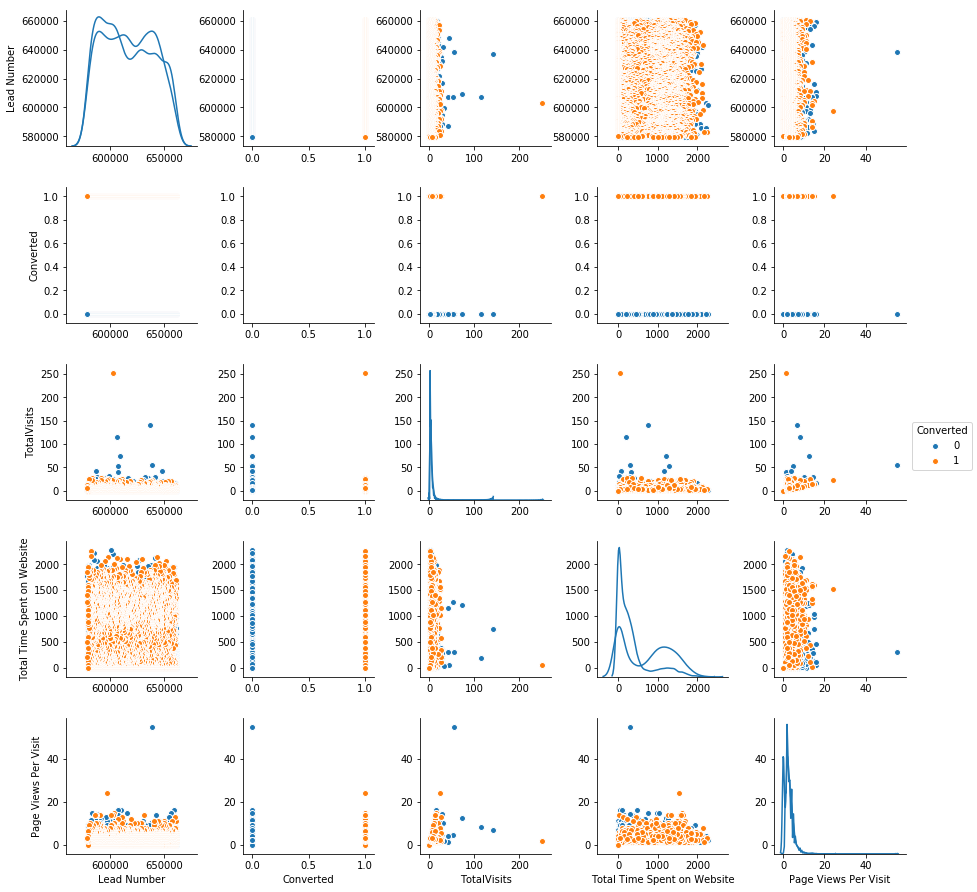

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(lead,diag_kind='kde',hue='Converted')
plt.show()

In [55]:
# Finding the null percentages across columns after removing the above columns
round(lead.isnull().sum()/len(lead.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

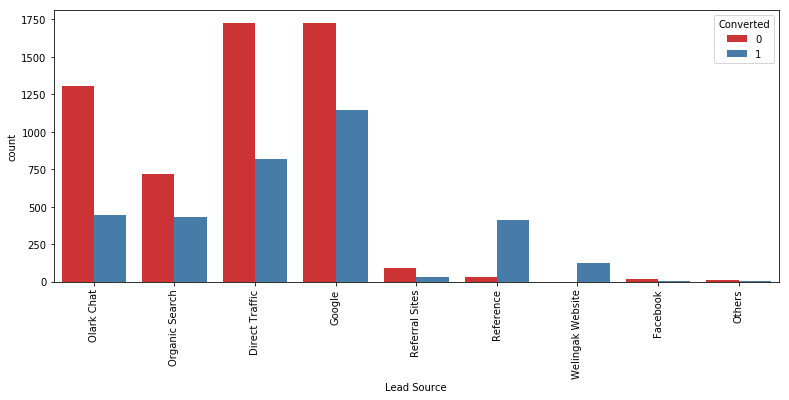

In [56]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead, palette='Set1')
plt.xticks(rotation = 90)
plt.show()

1.Google and Direct traffic generates maximum number of leads.
2.Conversion Rate of reference leads and leads through welingak website is high.

#  Do not Email

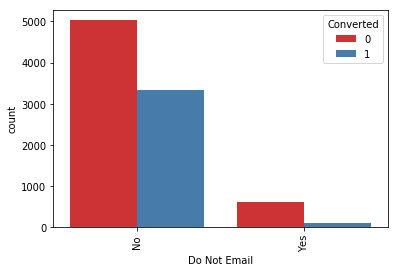

In [57]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

#  Do not call

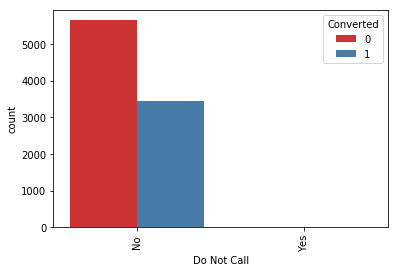

In [58]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Most entries are 'No'. No Inference can be drawn with this parameter.

### Total Time Spent on Website

In [59]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

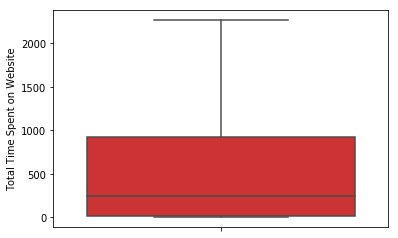

In [60]:
sns.boxplot(lead['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()

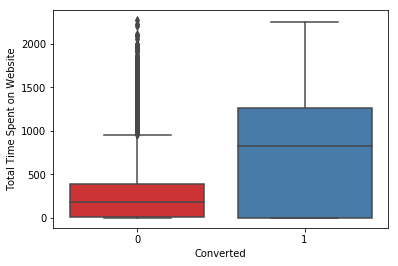

In [61]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead,palette='Set1')
plt.show()

Leads spending more time on the website are more likely to be converted.
Website should be made more engaging to make leads spend more time.

### Page Views Per Visit

In [62]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

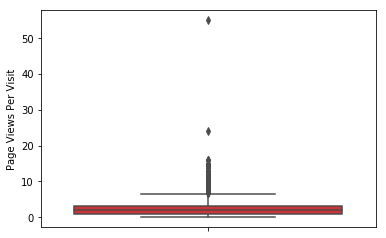

In [63]:
sns.boxplot(lead['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [64]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

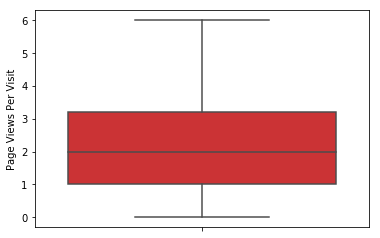

In [65]:
# Visualizing again
sns.boxplot(lead['Page Views Per Visit'],palette='Set1',orient='vert')
plt.show()

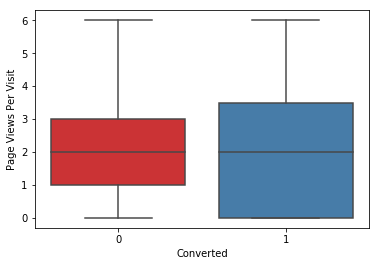

In [66]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead,palette='Set1')
plt.show()

Median for converted and unconverted leads is the same.

### Last Activity

In [67]:
lead['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

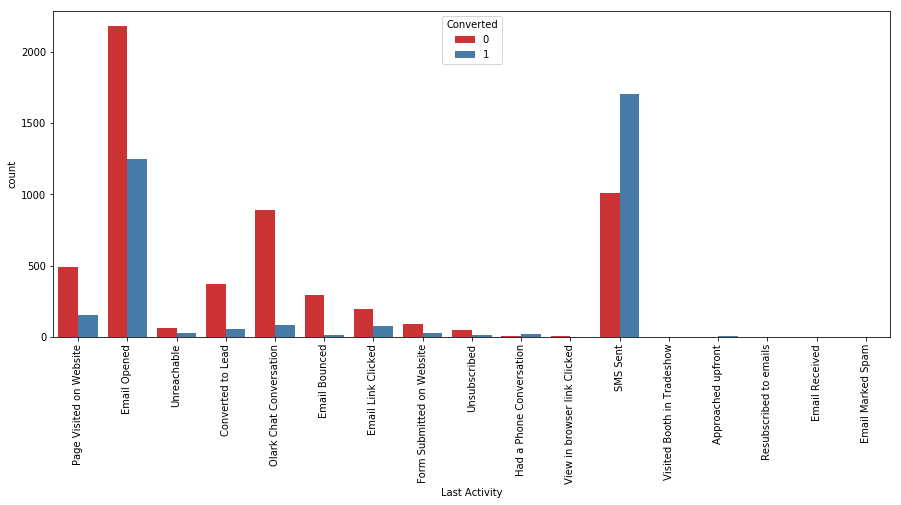

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [69]:
# We can club the last activities to "Other_Activity" which are having less data.
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

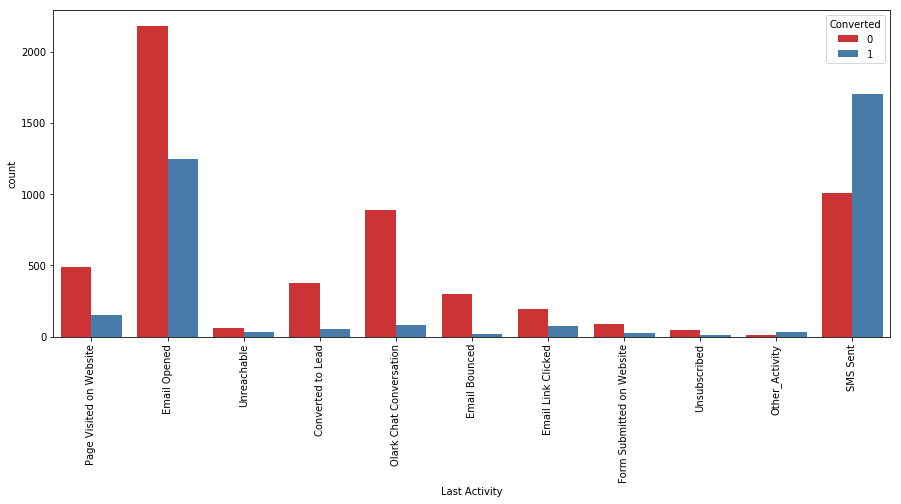

In [70]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Most of the lead have their Email opened as their last activity.
Conversion rate for leads with last activity as SMS Sent is almost 60%.

### Country

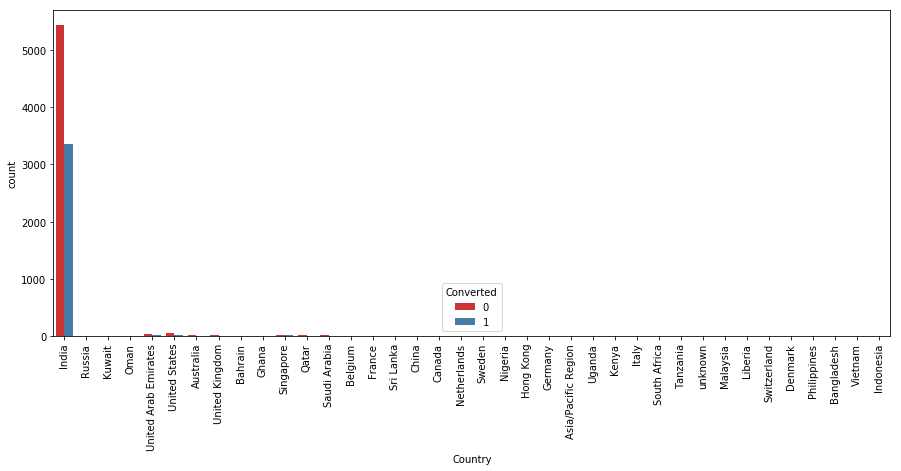

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Most values are 'India' no such inference can be drawn

### Specialization

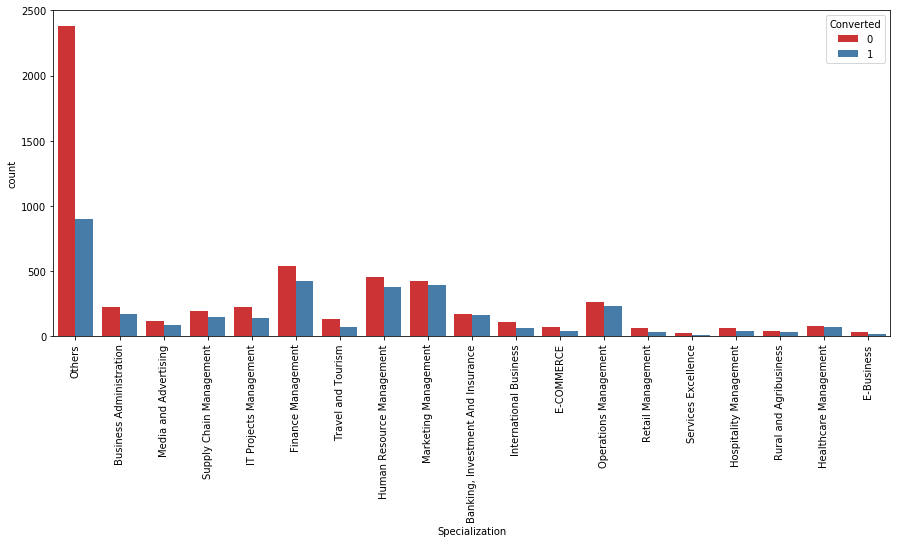

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Focus should be more on the Specialization with high conversion rate

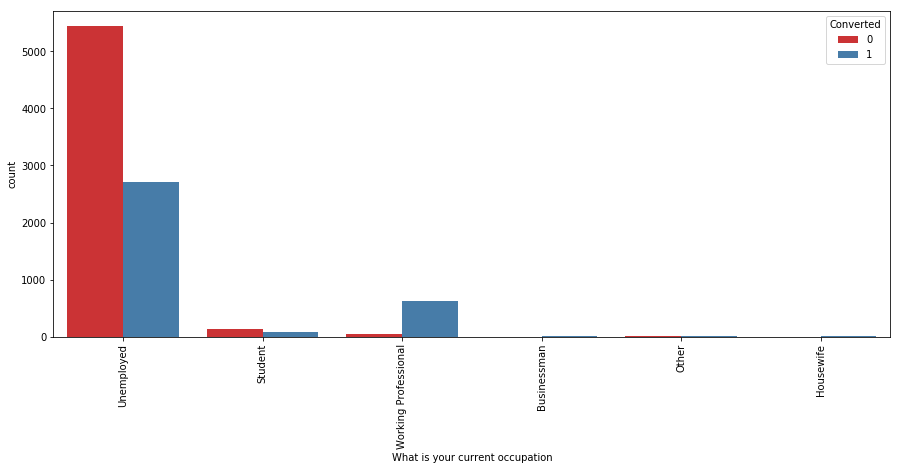

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

### Search

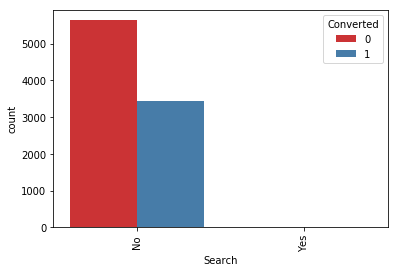

In [74]:
sns.countplot(x = "Search", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Newspaper

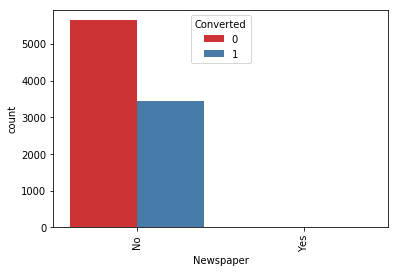

In [75]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Digital Advertisement

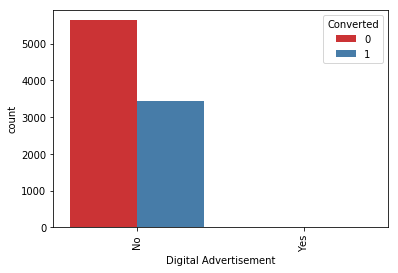

In [76]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### X Education Forums

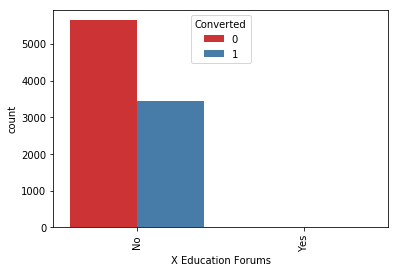

In [77]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Through Recommendations

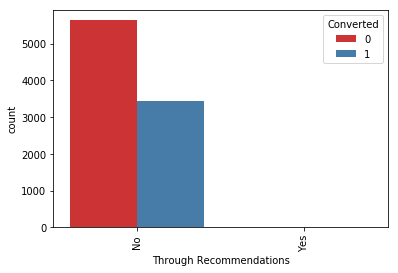

In [78]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Receive More Updates About Our Courses

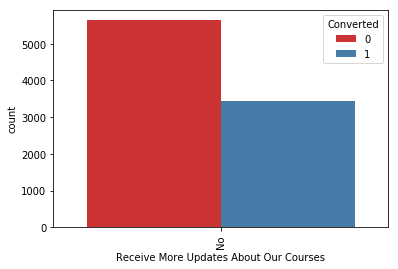

In [79]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Tags

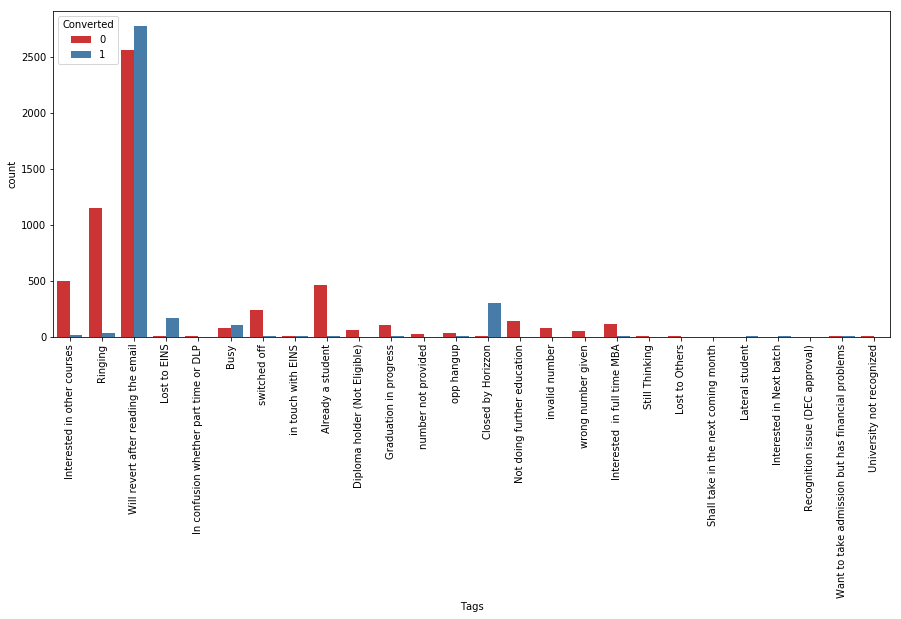

In [80]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### City

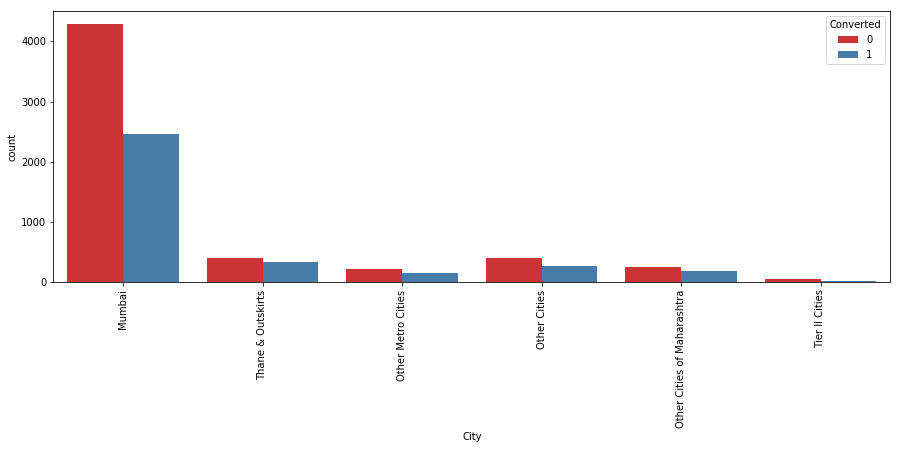

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Most leads are from mumbai with around 50% conversion rate.

### Last Notable Activity

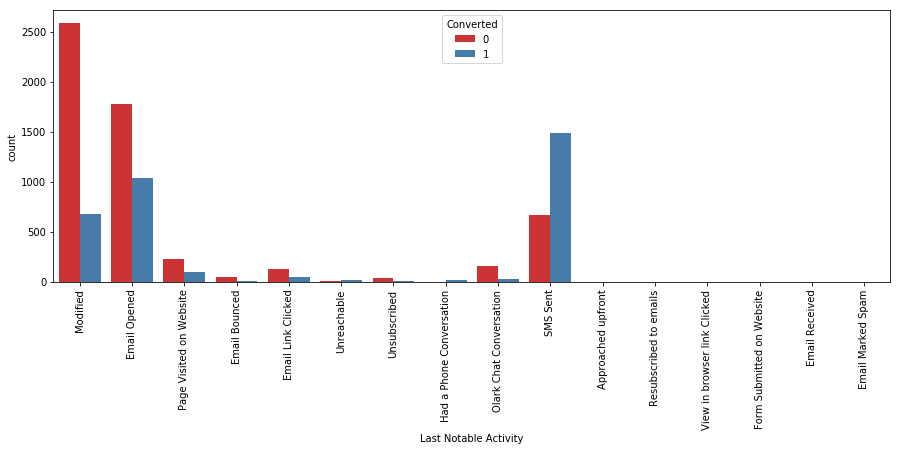

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [83]:
lead = lead.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [84]:
lead.shape

(9074, 14)

In [85]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                        9074 non-null object
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Do Not Email                       9074 non-null object
Do Not Call                        9074 non-null object
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
City                               9074 non-null object
Last Notable Activity              9074 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 1.4+ MB


### Data Preparation

### Converting some binary variables (Yes/No) to 1/0

In [86]:
var =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[var] = lead[var].apply(binary_map)

### Creating Dummy variables for the categorical features:

In [87]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 
                                       'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [88]:
# Concatenating the dummy_data to the lead dataframe
lead = pd.concat([lead, dummy_data], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


### Dropping the columns for which dummies were created

In [89]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [90]:
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting the data into train and test set

In [91]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [92]:
# Putting target variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the features

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.284595,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.284595,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.295588,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [95]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.855411064580117

We have almost 38% lead conversion rate.

### Selection Using RFE

In [96]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)            
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True], dtype=bool)

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 19),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', False, 21),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 26),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 9),
 ('Last Activity_SMS Sent', True, 1),
 ('L

In [99]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')

### Model Building

Model-1

In [100]:
import statsmodels.api as sm

In [101]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2578.3
Date:                Thu, 27 Apr 2023   Deviance:                       5156.6
Time:                        22:54:26   Pearson chi2:                 6.40e+03
No. Iterations:                    21                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7566      0.628      1.205      0.228      -0.474       1.987
Do Not Email                                            -1.6951      0.192     -8.842      0.000      -2.071      -1.319
Do Not Call                                             21.7784   3.33e+04      0.001      0.999   -6.52e+04    6.53e+04
Total Time Spent on Website                              1.1059      0.041     27.098      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1235      0.130     -8.650      0.000      -1.378      -0.869
Lead Origin_Lead Add Form                                1.5396      0.908      1.695      0.090      -0.241       3.320
Lead Origin_Lead Import                                  0.9798      0.478      2.051      0.040       0.044       1.916
Lead Source_Olark Chat                                   1.1256      0.124      9.059      0.000       0.882       1.369
Lead Source_Reference                                    1.8214      0.932      1.954      0.051      -0.005       3.648
Lead Source_Welingak Website                             4.4152      1.162      3.800      0.000       2.138       6.693
Last Activity_Olark Chat Conversation                   -1.0655      0.174     -6.118      0.000      -1.407      -0.724
Last Activity_Other_Activity                             1.9557      0.560      3.492      0.000       0.858       3.053
Last Activity_SMS Sent                                   0.7720      0.157      4.918      0.000       0.464       1.080
Last Activity_Unsubscribed                               1.0871      1.119      0.971      0.332      -1.107       3.281
Specialization_Others                                   -1.1445      0.126     -9.065      0.000      -1.392      -0.897
What is your current occupation_Housewife               21.8294   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
What is your current occupation_Student                 -0.5279      0.664     -0.795      0.427      -1.829       0.773
What is your current occupation_Unemployed              -0.9851      0.624     -1.578      0.115      -2.209       0.238
What is your current occupation_Working Professional     1.6360      0.651      2.513      0.012       0.360       2.912
City_Tier II Cities                                     -0.6201      0.452     -1.371      0.170      -1.507       0.267
Last Notable Activity_Had a Phone Conversation           1.3936      1.234      1.129      0.259      -1.025       3.812
Last Notable Activity_Modified                          -0.6378      0.098     -6.526      0.000      -0.829      -0.446
Last Notable Activity_SMS Sent                           0.7447      0.178      4.189      0.000       0.396       1.093
Last Notable Act

Pvalue of 'What is your current occupation_Housewife' is very high,so we dropping this columns.

In [102]:
col1 = cols.drop('What is your current occupation_Housewife')

Model-2

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2580.4
Date:                Thu, 27 Apr 2023   Deviance:                       5160.7
Time:                        22:54:27   Pearson chi2:                 6.41e+03
No. Iterations:                    20                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2403      0.583      2.128      0.033       0.098       2.383
Do Not Email                                            -1.6990      0.192     -8.856      0.000      -2.075      -1.323
Do Not Call                                             20.7835   2.02e+04      0.001      0.999   -3.96e+04    3.96e+04
Total Time Spent on Website                              1.1047      0.041     27.088      0.000       1.025       1.185
Lead Origin_Landing Page Submission                     -1.1169      0.130     -8.607      0.000      -1.371      -0.863
Lead Origin_Lead Add Form                                1.5423      0.909      1.697      0.090      -0.238       3.323
Lead Origin_Lead Import                                  0.9816      0.478      2.055      0.040       0.045       1.918
Lead Source_Olark Chat                                   1.1260      0.124      9.062      0.000       0.882       1.370
Lead Source_Reference                                    1.8243      0.932      1.957      0.050      -0.002       3.651
Lead Source_Welingak Website                             4.4136      1.162      3.798      0.000       2.136       6.691
Last Activity_Olark Chat Conversation                   -1.0656      0.174     -6.114      0.000      -1.407      -0.724
Last Activity_Other_Activity                             1.9579      0.560      3.496      0.000       0.860       3.056
Last Activity_SMS Sent                                   0.7741      0.157      4.930      0.000       0.466       1.082
Last Activity_Unsubscribed                               1.0914      1.119      0.975      0.330      -1.103       3.285
Specialization_Others                                   -1.1409      0.126     -9.043      0.000      -1.388      -0.894
What is your current occupation_Student                 -1.0155      0.620     -1.639      0.101      -2.230       0.199
What is your current occupation_Unemployed              -1.4721      0.577     -2.551      0.011      -2.603      -0.341
What is your current occupation_Working Professional     1.1487      0.606      1.896      0.058      -0.039       2.336
City_Tier II Cities                                     -0.6205      0.452     -1.371      0.170      -1.507       0.266
Last Notable Activity_Had a Phone Conversation           1.3885      1.234      1.125      0.260      -1.030       3.807
Last Notable Activity_Modified                          -0.6420      0.098     -6.571      0.000      -0.834      -0.451
Last Notable Activity_SMS Sent                           0.7406      0.178      4.166      0.000       0.392       1.089
Last Notable Activity_Unreachable                        1.6326      0.477      3.425      0.001       0.698       2.567
Last Notable Act

Pvalue of 'Do Not Call' is very high,so we dropping this columns.

In [104]:
col1 = col1.drop('Do Not Call')

### Model-3

In [105]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2581.1
Date:                Thu, 27 Apr 2023   Deviance:                       5162.2
Time:                        22:54:28   Pearson chi2:                 6.42e+03
No. Iterations:                    19                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2416      0.583      2.129      0.033       0.099       2.385
Do Not Email                                            -1.7004      0.192     -8.859      0.000      -2.077      -1.324
Total Time Spent on Website                              1.1050      0.041     27.100      0.000       1.025       1.185
Lead Origin_Landing Page Submission                     -1.1221      0.130     -8.655      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.5397      0.908      1.695      0.090      -0.241       3.320
Lead Origin_Lead Import                                  0.9793      0.478      2.050      0.040       0.043       1.916
Lead Source_Olark Chat                                   1.1246      0.124      9.051      0.000       0.881       1.368
Lead Source_Reference                                    1.8443      0.932      1.979      0.048       0.018       3.671
Lead Source_Welingak Website                             4.4174      1.162      3.802      0.000       2.140       6.695
Last Activity_Olark Chat Conversation                   -1.0567      0.173     -6.093      0.000      -1.397      -0.717
Last Activity_Other_Activity                             1.9572      0.560      3.494      0.000       0.859       3.055
Last Activity_SMS Sent                                   0.7716      0.157      4.913      0.000       0.464       1.079
Last Activity_Unsubscribed                               1.0904      1.120      0.974      0.330      -1.104       3.285
Specialization_Others                                   -1.1471      0.126     -9.098      0.000      -1.394      -0.900
What is your current occupation_Student                 -1.0131      0.620     -1.634      0.102      -2.228       0.202
What is your current occupation_Unemployed              -1.4687      0.577     -2.544      0.011      -2.600      -0.337
What is your current occupation_Working Professional     1.1507      0.606      1.898      0.058      -0.037       2.339
City_Tier II Cities                                     -0.6206      0.452     -1.372      0.170      -1.507       0.266
Last Notable Activity_Had a Phone Conversation           1.3893      1.234      1.126      0.260      -1.030       3.808
Last Notable Activity_Modified                          -0.6396      0.098     -6.550      0.000      -0.831      -0.448
Last Notable Activity_SMS Sent                           0.7437      0.178      4.184      0.000       0.395       1.092
Last Notable Activity_Unreachable                        1.6331      0.477      3.425      0.001       0.699       2.568
Last Notable Activity_Unsubscribed                       0.4348      1.221      0.356      0.722      -1.958       2.828
Last Notable Act

In [106]:
col1 = col1.drop('Last Notable Activity_View in browser link Clicked')

### Model-4

In [107]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2582.3
Date:                Thu, 27 Apr 2023   Deviance:                       5164.6
Time:                        22:54:28   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2318      0.583      2.114      0.035       0.090       2.374
Do Not Email                                            -1.6991      0.192     -8.861      0.000      -2.075      -1.323
Total Time Spent on Website                              1.1062      0.041     27.133      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1118      0.129     -8.593      0.000      -1.365      -0.858
Lead Origin_Lead Add Form                                1.5461      0.909      1.702      0.089      -0.235       3.327
Lead Origin_Lead Import                                  0.9877      0.478      2.069      0.039       0.052       1.924
Lead Source_Olark Chat                                   1.1296      0.124      9.095      0.000       0.886       1.373
Lead Source_Reference                                    1.8451      0.932      1.980      0.048       0.018       3.672
Lead Source_Welingak Website                             4.4134      1.162      3.798      0.000       2.136       6.691
Last Activity_Olark Chat Conversation                   -1.0599      0.173     -6.114      0.000      -1.400      -0.720
Last Activity_Other_Activity                             1.7504      0.533      3.283      0.001       0.705       2.795
Last Activity_SMS Sent                                   0.7675      0.157      4.889      0.000       0.460       1.075
Last Activity_Unsubscribed                               1.0859      1.120      0.970      0.332      -1.109       3.280
Specialization_Others                                   -1.1376      0.126     -9.042      0.000      -1.384      -0.891
What is your current occupation_Student                 -1.0150      0.619     -1.639      0.101      -2.229       0.199
What is your current occupation_Unemployed              -1.4708      0.577     -2.549      0.011      -2.602      -0.340
What is your current occupation_Working Professional     1.1514      0.606      1.901      0.057      -0.036       2.339
City_Tier II Cities                                     -0.6217      0.452     -1.374      0.169      -1.508       0.265
Last Notable Activity_Had a Phone Conversation           1.5995      1.222      1.309      0.190      -0.795       3.994
Last Notable Activity_Modified                          -0.6343      0.098     -6.504      0.000      -0.825      -0.443
Last Notable Activity_SMS Sent                           0.7490      0.178      4.215      0.000       0.401       1.097
Last Notable Activity_Unreachable                        1.6357      0.477      3.431      0.001       0.701       2.570
Last Notable Activity_Unsubscribed                       0.4397      1.221      0.360      0.719      -1.954       2.833
================

In [108]:
col1 = col1.drop('Last Notable Activity_Unsubscribed')

### Model-5

In [109]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2582.4
Date:                Thu, 27 Apr 2023   Deviance:                       5164.7
Time:                        22:54:28   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2328      0.583      2.115      0.034       0.091       2.375
Do Not Email                                            -1.6944      0.191     -8.870      0.000      -2.069      -1.320
Total Time Spent on Website                              1.1065      0.041     27.145      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1124      0.129     -8.597      0.000      -1.366      -0.859
Lead Origin_Lead Add Form                                1.5464      0.909      1.702      0.089      -0.235       3.327
Lead Origin_Lead Import                                  0.9876      0.478      2.068      0.039       0.052       1.924
Lead Source_Olark Chat                                   1.1302      0.124      9.100      0.000       0.887       1.374
Lead Source_Reference                                    1.8447      0.932      1.979      0.048       0.018       3.672
Lead Source_Welingak Website                             4.4123      1.162      3.796      0.000       2.134       6.690
Last Activity_Olark Chat Conversation                   -1.0587      0.173     -6.107      0.000      -1.398      -0.719
Last Activity_Other_Activity                             1.7516      0.533      3.285      0.001       0.707       2.797
Last Activity_SMS Sent                                   0.7697      0.157      4.906      0.000       0.462       1.077
Last Activity_Unsubscribed                               1.4414      0.480      3.002      0.003       0.500       2.382
Specialization_Others                                   -1.1380      0.126     -9.044      0.000      -1.385      -0.891
What is your current occupation_Student                 -1.0152      0.620     -1.639      0.101      -2.230       0.199
What is your current occupation_Unemployed              -1.4708      0.577     -2.549      0.011      -2.602      -0.340
What is your current occupation_Working Professional     1.1519      0.606      1.901      0.057      -0.036       2.339
City_Tier II Cities                                     -0.6218      0.452     -1.374      0.169      -1.509       0.265
Last Notable Activity_Had a Phone Conversation           1.5978      1.222      1.308      0.191      -0.797       3.993
Last Notable Activity_Modified                          -0.6374      0.097     -6.562      0.000      -0.828      -0.447
Last Notable Activity_SMS Sent                           0.7459      0.178      4.202      0.000       0.398       1.094
Last Notable Activity_Unreachable                        1.6349      0.477      3.429      0.001       0.701       2.569
========================================================================================================================
"""

In [110]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

### Model-6

In [111]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2583.4
Date:                Thu, 27 Apr 2023   Deviance:                       5166.8
Time:                        22:54:29   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2382      0.583      2.123      0.034       0.095       2.381
Do Not Email                                            -1.6975      0.191     -8.873      0.000      -2.072      -1.323
Total Time Spent on Website                              1.1053      0.041     27.129      0.000       1.025       1.185
Lead Origin_Landing Page Submission                     -1.1127      0.129     -8.603      0.000      -1.366      -0.859
Lead Origin_Lead Add Form                                1.5460      0.909      1.701      0.089      -0.235       3.327
Lead Origin_Lead Import                                  0.9846      0.478      2.062      0.039       0.049       1.921
Lead Source_Olark Chat                                   1.1273      0.124      9.076      0.000       0.884       1.371
Lead Source_Reference                                    1.8430      0.932      1.977      0.048       0.016       3.670
Lead Source_Welingak Website                             4.4137      1.162      3.798      0.000       2.136       6.692
Last Activity_Olark Chat Conversation                   -1.0515      0.173     -6.067      0.000      -1.391      -0.712
Last Activity_Other_Activity                             2.1618      0.459      4.707      0.000       1.262       3.062
Last Activity_SMS Sent                                   0.7771      0.157      4.955      0.000       0.470       1.085
Last Activity_Unsubscribed                               1.4432      0.480      3.005      0.003       0.502       2.384
Specialization_Others                                   -1.1424      0.126     -9.080      0.000      -1.389      -0.896
What is your current occupation_Student                 -1.0161      0.620     -1.639      0.101      -2.231       0.199
What is your current occupation_Unemployed              -1.4706      0.577     -2.547      0.011      -2.602      -0.339
What is your current occupation_Working Professional     1.1478      0.606      1.894      0.058      -0.040       2.336
City_Tier II Cities                                     -0.6221      0.453     -1.375      0.169      -1.509       0.265
Last Notable Activity_Modified                          -0.6477      0.097     -6.680      0.000      -0.838      -0.458
Last Notable Activity_SMS Sent                           0.7353      0.177      4.146      0.000       0.388       1.083
Last Notable Activity_Unreachable                        1.6310      0.477      3.421      0.001       0.697       2.565
========================================================================================================================
"""

In [112]:
col1 = col1.drop('City_Tier II Cities')

### Model-7

In [113]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2584.4
Date:                Thu, 27 Apr 2023   Deviance:                       5168.8
Time:                        22:54:29   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2431      0.583      2.131      0.033       0.100       2.386
Do Not Email                                            -1.7069      0.191     -8.941      0.000      -2.081      -1.333
Total Time Spent on Website                              1.1051      0.041     27.133      0.000       1.025       1.185
Lead Origin_Landing Page Submission                     -1.1190      0.129     -8.655      0.000      -1.372      -0.866
Lead Origin_Lead Add Form                                1.5461      0.909      1.701      0.089      -0.235       3.327
Lead Origin_Lead Import                                  0.9841      0.478      2.060      0.039       0.048       1.920
Lead Source_Olark Chat                                   1.1266      0.124      9.072      0.000       0.883       1.370
Lead Source_Reference                                    1.8428      0.932      1.977      0.048       0.016       3.670
Lead Source_Welingak Website                             4.4149      1.162      3.798      0.000       2.137       6.693
Last Activity_Olark Chat Conversation                   -1.0499      0.173     -6.059      0.000      -1.390      -0.710
Last Activity_Other_Activity                             2.1663      0.459      4.717      0.000       1.266       3.066
Last Activity_SMS Sent                                   0.7795      0.157      4.974      0.000       0.472       1.087
Last Activity_Unsubscribed                               1.4558      0.480      3.033      0.002       0.515       2.397
Specialization_Others                                   -1.1418      0.126     -9.073      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0165      0.620     -1.639      0.101      -2.232       0.199
What is your current occupation_Unemployed              -1.4751      0.578     -2.554      0.011      -2.607      -0.343
What is your current occupation_Working Professional     1.1396      0.606      1.880      0.060      -0.048       2.328
Last Notable Activity_Modified                          -0.6499      0.097     -6.705      0.000      -0.840      -0.460
Last Notable Activity_SMS Sent                           0.7317      0.177      4.128      0.000       0.384       1.079
Last Notable Activity_Unreachable                        1.6346      0.477      3.429      0.001       0.700       2.569
========================================================================================================================
"""

In [114]:
col1 = col1.drop('What is your current occupation_Student')

### Model-8

In [115]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2585.8
Date:                Thu, 27 Apr 2023   Deviance:                       5171.6
Time:                        22:54:29   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3851      0.240      1.605      0.108      -0.085       0.855
Do Not Email                                            -1.7034      0.191     -8.936      0.000      -2.077      -1.330
Total Time Spent on Website                              1.1059      0.041     27.161      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1320      0.129     -8.772      0.000      -1.385      -0.879
Lead Origin_Lead Add Form                                1.5400      0.908      1.695      0.090      -0.240       3.320
Lead Origin_Lead Import                                  0.9771      0.478      2.045      0.041       0.041       1.914
Lead Source_Olark Chat                                   1.1214      0.124      9.037      0.000       0.878       1.365
Lead Source_Reference                                    1.8487      0.932      1.984      0.047       0.022       3.675
Lead Source_Welingak Website                             4.4197      1.162      3.804      0.000       2.142       6.697
Last Activity_Olark Chat Conversation                   -1.0516      0.173     -6.075      0.000      -1.391      -0.712
Last Activity_Other_Activity                             2.1650      0.459      4.714      0.000       1.265       3.065
Last Activity_SMS Sent                                   0.7774      0.157      4.962      0.000       0.470       1.085
Last Activity_Unsubscribed                               1.4520      0.480      3.025      0.002       0.511       2.393
Specialization_Others                                   -1.1534      0.126     -9.179      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6051      0.212     -2.852      0.004      -1.021      -0.189
What is your current occupation_Working Professional     2.0084      0.282      7.114      0.000       1.455       2.562
Last Notable Activity_Modified                          -0.6472      0.097     -6.683      0.000      -0.837      -0.457
Last Notable Activity_SMS Sent                           0.7329      0.177      4.135      0.000       0.386       1.080
Last Notable Activity_Unreachable                        1.6401      0.476      3.447      0.001       0.708       2.573
========================================================================================================================
"""

### Checking for VIF values

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.60
6,Lead Source_Reference,48.08
7,Lead Source_Welingak Website,15.51
13,What is your current occupation_Unemployed,9.85
16,Last Notable Activity_SMS Sent,6.48
10,Last Activity_SMS Sent,6.26
2,Lead Origin_Landing Page Submission,5.77
12,Specialization_Others,4.00
15,Last Notable Activity_Modified,2.47
5,Lead Source_Olark Chat,2.24


In [117]:
col1 = col1.drop('Lead Origin_Lead Add Form')

### model-9

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2587.4
Date:                Thu, 27 Apr 2023   Deviance:                       5174.8
Time:                        22:54:30   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4017      0.240      1.675      0.094      -0.068       0.872
Do Not Email                                            -1.7052      0.191     -8.945      0.000      -2.079      -1.332
Total Time Spent on Website                              1.1038      0.041     27.153      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1502      0.129     -8.935      0.000      -1.402      -0.898
Lead Origin_Lead Import                                  0.9609      0.478      2.010      0.044       0.024       1.898
Lead Source_Olark Chat                                   1.1144      0.124      9.000      0.000       0.872       1.357
Lead Source_Reference                                    3.3740      0.243     13.878      0.000       2.898       3.851
Lead Source_Welingak Website                             5.9508      0.732      8.133      0.000       4.517       7.385
Last Activity_Olark Chat Conversation                   -1.0563      0.173     -6.104      0.000      -1.396      -0.717
Last Activity_Other_Activity                             2.1606      0.459      4.705      0.000       1.261       3.061
Last Activity_SMS Sent                                   0.7744      0.157      4.944      0.000       0.467       1.081
Last Activity_Unsubscribed                               1.4506      0.480      3.023      0.003       0.510       2.391
Specialization_Others                                   -1.1653      0.126     -9.282      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.6023      0.212     -2.839      0.005      -1.018      -0.186
What is your current occupation_Working Professional     2.0080      0.282      7.111      0.000       1.455       2.561
Last Notable Activity_Modified                          -0.6466      0.097     -6.681      0.000      -0.836      -0.457
Last Notable Activity_SMS Sent                           0.7368      0.177      4.159      0.000       0.390       1.084
Last Notable Activity_Unreachable                        1.6358      0.476      3.438      0.001       0.703       2.568
========================================================================================================================
"""

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.81
15,Last Notable Activity_SMS Sent,6.48
9,Last Activity_SMS Sent,6.26
2,Lead Origin_Landing Page Submission,5.75
11,Specialization_Others,4.00
14,Last Notable Activity_Modified,2.47
4,Lead Source_Olark Chat,2.24
13,What is your current occupation_Working Profes...,1.67
7,Last Activity_Olark Chat Conversation,1.63
5,Lead Source_Reference,1.46


In [120]:
col1 = col1.drop('What is your current occupation_Unemployed')

### model-10

In [121]:
X_train_sm = sm.add_constant(X_train[col1])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2591.3
Date:                Thu, 27 Apr 2023   Deviance:                       5182.6
Time:                        22:54:32   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1714      0.128     -1.336      0.182      -0.423       0.080
Do Not Email                                            -1.7006      0.191     -8.913      0.000      -2.075      -1.327
Total Time Spent on Website                              1.1038      0.041     27.169      0.000       1.024       1.183
Lead Origin_Landing Page Submission                     -1.1542      0.129     -8.960      0.000      -1.407      -0.902
Lead Origin_Lead Import                                  0.9417      0.478      1.970      0.049       0.005       1.878
Lead Source_Olark Chat                                   1.1201      0.124      9.045      0.000       0.877       1.363
Lead Source_Reference                                    3.3857      0.243     13.945      0.000       2.910       3.861
Lead Source_Welingak Website                             5.9420      0.732      8.122      0.000       4.508       7.376
Last Activity_Olark Chat Conversation                   -1.0474      0.173     -6.060      0.000      -1.386      -0.709
Last Activity_Other_Activity                             2.1424      0.459      4.663      0.000       1.242       3.043
Last Activity_SMS Sent                                   0.7623      0.156      4.874      0.000       0.456       1.069
Last Activity_Unsubscribed                               1.4243      0.480      2.968      0.003       0.484       2.365
Specialization_Others                                   -1.1772      0.126     -9.362      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.5908      0.194     13.327      0.000       2.210       2.972
Last Notable Activity_Modified                          -0.6545      0.097     -6.764      0.000      -0.844      -0.465
Last Notable Activity_SMS Sent                           0.7326      0.177      4.139      0.000       0.386       1.080
Last Notable Activity_Unreachable                        1.6195      0.474      3.414      0.001       0.690       2.549
========================================================================================================================
"""

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.42
9,Last Activity_SMS Sent,6.26
13,Last Notable Activity_Modified,2.35
11,Specialization_Others,2.21
4,Lead Source_Olark Chat,2.04
2,Lead Origin_Landing Page Submission,1.79
7,Last Activity_Olark Chat Conversation,1.63
1,Total Time Spent on Website,1.30
5,Lead Source_Reference,1.24
0,Do Not Email,1.21


In [123]:
col1 = col1.drop('Last Notable Activity_SMS Sent')

### model-11

In [124]:
X_train_sm = sm.add_constant(X_train[col1])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Thu, 27 Apr 2023   Deviance:                       5200.0
Time:                        22:54:32   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Other_Activity                             2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_Others                                   -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

In [125]:
col1 = col1.drop('Lead Origin_Lead Import')

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


 reduce the variables

In [127]:
col1 = col1.drop('Last Notable Activity_Unreachable')

### model-12

In [128]:
X_train_sm = sm.add_constant(X_train[col1])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Thu, 27 Apr 2023   Deviance:                       5214.0
Time:                        22:54:33   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0474      0.125     -0.378      0.705      -0.293       0.198
Do Not Email                                            -1.6797      0.191     -8.807      0.000      -2.053      -1.306
Total Time Spent on Website                              1.0943      0.040     27.185      0.000       1.015       1.173
Lead Origin_Landing Page Submission                     -1.1910      0.128     -9.338      0.000      -1.441      -0.941
Lead Source_Olark Chat                                   1.0811      0.122      8.837      0.000       0.841       1.321
Lead Source_Reference                                    3.3281      0.242     13.772      0.000       2.854       3.802
Lead Source_Welingak Website                             5.8458      0.729      8.015      0.000       4.416       7.275
Last Activity_Olark Chat Conversation                   -0.9554      0.171     -5.574      0.000      -1.291      -0.619
Last Activity_Other_Activity                             2.1868      0.463      4.726      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3095      0.075     17.435      0.000       1.162       1.457
Last Activity_Unsubscribed                               1.3641      0.482      2.830      0.005       0.419       2.309
Specialization_Others                                   -1.2017      0.126     -9.571      0.000      -1.448      -0.956
What is your current occupation_Working Professional     2.6075      0.194     13.410      0.000       2.226       2.989
Last Notable Activity_Modified                          -0.8936      0.081    -11.002      0.000      -1.053      -0.734
========================================================================================================================
"""

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 13 variables in our final model

### Making Prediction on the Train set

In [130]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.195642
1012    0.108782
9226    0.326407
4750    0.866384
7987    0.799849
1281    0.745412
2880    0.099499
4971    0.965955
7536    0.853269
1248    0.770418
dtype: float64

In [131]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.19564211,  0.10878227,  0.32640737,  0.86638384,  0.79984858,
        0.74541236,  0.09949947,  0.96595542,  0.85326938,  0.77041836])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [132]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.195642,3009
1,0,0.108782,1012
2,0,0.326407,9226
3,1,0.866384,4750
4,1,0.799849,7987


### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [134]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.195642,3009,0
1,0,0.108782,1012,0
2,0,0.326407,9226,0
3,1,0.866384,4750,1
4,1,0.799849,7987,1


### Making the Confusion matrix

In [135]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 716 1730]]


### accuracy

In [136]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.817036687136


In [137]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

### Sensitivity 

In [138]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.707277187244


### Specificity

In [139]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.885787451985


### False Positive Rate

In [140]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.114212548015


### Positive Predictive Value

In [141]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.795036764706


### Negative predictive value

In [142]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.828502994012


### Plotting the ROC Curve

In [143]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

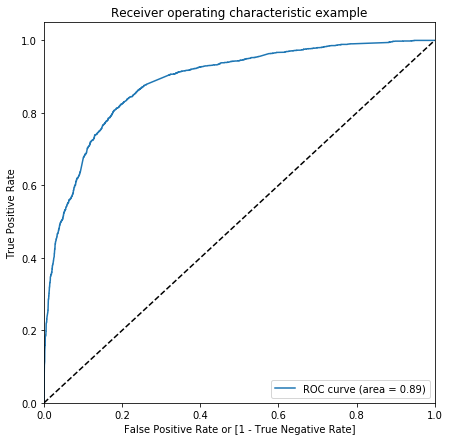

In [145]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

In [146]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.195642,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.108782,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.326407,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866384,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.799849,7987,1,1,1,1,1,1,1,1,1,0,0


In [147]:
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

In [148]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.587781  0.973017  0.346479
0.2   0.2  0.749173  0.915372  0.645070
0.3   0.3  0.800976  0.849959  0.770294
0.4   0.4  0.816092  0.773508  0.842766
0.5   0.5  0.817037  0.707277  0.885787
0.6   0.6  0.797512  0.600164  0.921127
0.7   0.7  0.786490  0.529436  0.947503
0.8   0.8  0.761612  0.425184  0.972343
0.9   0.9  0.721619  0.296811  0.987708


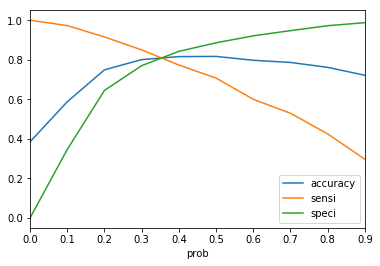

In [149]:
#  plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability

In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.195642,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.108782,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.326407,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866384,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.799849,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [151]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))



In [152]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.195642,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.108782,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.326407,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.866384,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.799849,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


### Model Evaluation

### overall accuracy

In [153]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.811053377421


In [154]:
# Confusion matrix


In [155]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3148,  757],
       [ 443, 2003]], dtype=int64)

In [156]:
TP = confusion2[1,1]
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

### Sensitivity

In [157]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.818887980376


### Specificity 

In [158]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.806145966709


### False Positive rate

In [159]:
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.193854033291


### Positive Predictive Value

In [160]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.725724637681


### Negative Predictive Value

In [161]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.876636034531


### Precision and Recall

In [162]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 716, 1730]], dtype=int64)

### Precision


In [163]:
#TP / TP + FP

In [164]:
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.795036764706


### Recall

In [165]:

#TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.707277187244


### Precision and recall tradeoff

In [166]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       1
 10      1
 11      0
 12      0
 13      1
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [167]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

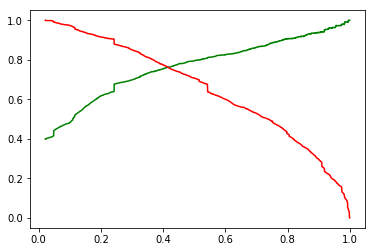

In [168]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The  graph shows the trade-off between the Precision and Recall .

### Making predictions on the test set

#### Scaling the test data

In [169]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [170]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0


In [171]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.129393
1490    0.968762
7936    0.111751
4216    0.804505
3830    0.132210
1800    0.633964
6507    0.344721
4821    0.301208
4223    0.918045
4714    0.326407
dtype: float64

In [172]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.129393
1490,0.968762
7936,0.111751
4216,0.804505
3830,0.132210


In [173]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [174]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [175]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [176]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.129393
1,1,1490,0.968762
2,0,7936,0.111751
3,1,4216,0.804505
4,0,3830,0.132210


In [177]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [178]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [179]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.129393
1,1,1490,0.968762
2,0,7936,0.111751
3,1,4216,0.804505
4,0,3830,0.132210


In [180]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.129393,0
1,1,1490,0.968762,1
2,0,7936,0.111751,0
3,1,4216,0.804505,1
4,0,3830,0.132210,0


In [181]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.804260007345


In [182]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1394,  340],
       [ 193,  796]], dtype=int64)

In [183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity

In [184]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.80485338726


In [185]:
# Calculate Precision

TP/(TP+FP)

0.70070422535211263

In [186]:
# Calculate Recall

TP/(TP+FN)

0.80485338725985844

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.80392156862745101

### Assigning Lead Score to the Testing data

In [188]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
0,0,3271,0.129393,0,13
1,1,1490,0.968762,1,97
2,0,7936,0.111751,0,11
3,1,4216,0.804505,1,80
4,0,3830,0.132210,0,13


### Results :

Finding out the leads which should be contacted

In [189]:
contacted_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
contacted_leads

,Converted,Prospect ID,Converted_prob,final_predicted,Lead_Score
1,1,1490,0.968762,1,97
8,1,4223,0.918045,1,92
16,1,1946,0.924785,1,92
21,1,2461,0.992852,1,99
23,1,5822,0.998025,1,100
25,1,2684,0.998025,1,100
30,1,2010,0.982825,1,98
33,1,4062,0.993158,1,99
35,1,7696,0.931002,1,93
36,1,9049,0.877890,1,88


The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. 
They can be termed as 'contacted leads'.
So there are 368 leads which can be contacted and have a high chance of getting converted.

Finding out the Important Features from our final model:

In [190]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.845756
Lead Source_Reference                                   3.328115
What is your current occupation_Working Professional    2.607500
Last Activity_Other_Activity                            2.186759
Last Activity_Unsubscribed                              1.364140
Last Activity_SMS Sent                                  1.309507
Total Time Spent on Website                             1.094285
Lead Source_Olark Chat                                  1.081150
const                                                  -0.047402
Last Notable Activity_Modified                         -0.893587
Last Activity_Olark Chat Conversation                  -0.955424
Lead Origin_Landing Page Submission                    -1.190991
Specialization_Others                                  -1.201711
Do Not Email                                           -1.679670
dtype: float64

### Recommendations:
1.The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more   likely to get converted.
2.The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.

3.The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

4.The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.

5.The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.

6.The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

7.The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.

8.The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.

9.The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.
